<a href="https://colab.research.google.com/github/fikahusnaamalinamubarok/Hypothesis-Testing-Concept/blob/main/HW_REGRESSION_FikaHusnaAmalinaMubarok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Load Data

In [ ]:
# load data
medv = pd.read_csv('/content/drive/MyDrive/boston.csv')
medv.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


###1. Split Data-Validation-test


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = medv.drop(columns='medv')
target = medv[['medv']]

feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

##2. Multicollinearity Check & draw correlation plot & highly correlated features selection

In [ ]:
# calculate VIF scores ( check )
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_pretrain)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


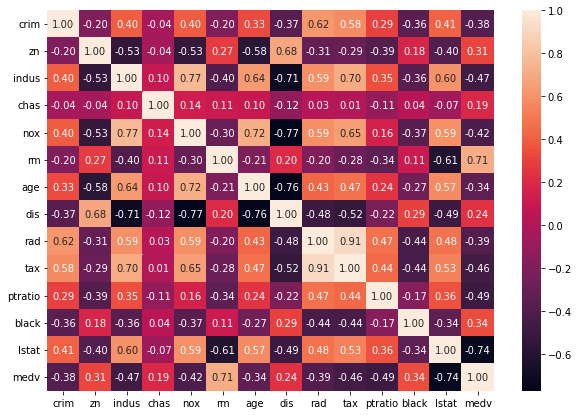

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_pretrain, target_medv_pretrain], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f' )
plt.show()

We need to drop (rad):  because rad (-0.39 ) and tax (-0,46) on target medv. 

In [ ]:
feature_medv_pretrain = feature_medv_pretrain.drop(columns=['rad'])
feature_medv_train = feature_medv_train.drop(columns=['rad'])
feature_medv_validation = feature_medv_validation.drop(columns=['rad'])
feature_medv_test = feature_medv_test.drop(columns=['rad'])

##Recheck VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_pretrain)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.593872
2,zn,2.413664
3,indus,3.658237
4,chas,1.084671
5,nox,4.411973
6,rm,1.884987
7,age,2.977080
8,dis,4.166015
9,tax,3.331299
10,ptratio,1.776290


###3.models on training data (lambdas = [0.01, 0.1, 1, 10])


###Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

##Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

### 4. Best Lambda from the validation set

### a.

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579991
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


##We can see that Ridge with alpha=10, has the smalles RMSE (The best model)

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


##We can see that Lasso with alpha=1.0, has the smalles RMSE (The best model)

## b .Model Evaluation

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


### Diagnostic Study
Not mandatory ( TIDAK WAJIB )

##Ridge

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.748587526366982


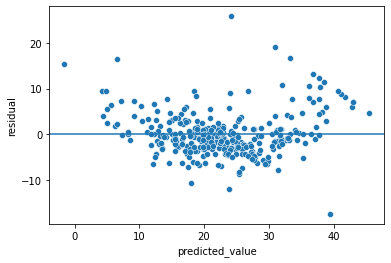

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

##lasso

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.7056815963218595


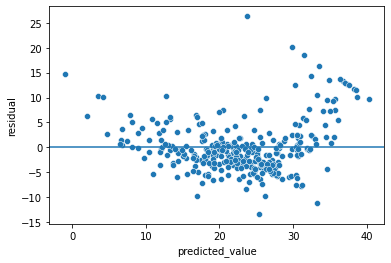

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

##Training Error

###RIdge

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 4.778640361040111
MAE for training data is 3.3776762058865626
MAPE for training data is 0.16868073663359498


##Testing Error

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.2444816457044965
MAPE for testing data is 0.17618402626767926


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_medv_test, y_predict_test)
mean_absolute_percentage_error(y_medv_test, y_predict_test)

0.17618402626767926

##Ridge Regression menggunakan alpha 10 , MAPE pada testing error : 17,6 % cukup baik dikarenakan dibawah 30% kriteria. Nilai MAE rata-rata pada testing error menyimpang3.24 dari data medv. Nilai MAPE pada testing error dan training error tidak beda jaug jadi tidak overfit 

###Lasso

##Training error


In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


###Testing Error

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = lasso_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_medv_test, y_predict_test)
mean_absolute_percentage_error(y_medv_test, y_predict_test)

0.17856606338732206

Ridge Regression menggunakan alpha 1.0 , MAPE pada testing error : 17,8 % cukup baik dikarenakan dibawah 30% kriteria. Nilai MAE rata-rata pada testing error menyimpang3.39 dari data medv. Nilai MAPE pada testing error dan training error tidak beda jaug jadi tidak overfit 